# $\textbf{Title}$
$\text{Author: Ryan Burns}$

### $\textbf{Import Dependencies}$

In [1]:
from numpy import array, matmul, transpose, identity, hstack, vstack, shape
from numpy import expand_dims, zeros
from time import time
from galois_tools import *

### $\textbf{Load Primitive Polynomial Coefficients of Specified Degree Over }GF(2)$

In [2]:
# Primitive polynomial degree
deg = 32 # (number of bits)

# Read list of primitive polynomial coefficients for definition
# of the linear feedback shift registers yielding m-sequences
coeff_catalog = read_polynomials_from_file(deg=deg)

### $\textbf{Define Shift Register Parameters}$

In [3]:
# Index of polynomial in list from file
poly_idx = 0

# Primitive polynomial coeff. over GF(2)
coeff = coeff_catalog[poly_idx]

# Initial state of register
seed = 67

# Feedback mask, equivalent to primitive polynomial
mask = eval(hex2bin(coeff,nbits=deg))

### $\textbf{Define LFSR Objects}$

In [17]:
# Number-theoretic implementation (efficient)
lfsr1 = LFSR(
    mask=mask,
    seed=seed,
    order=deg)

from numpy import fliplr,flipud
# Linear algebraic implementation (less efficient)
lfsr2 = LinearAlgebraicLFSR(
    feedback_polynomial=(str2vec(int2bin(mask,32))),
    seed=(str2vec(int2bin(seed,32))),form='galois')

In [18]:
str2vec(int2bin(mask,32))

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

<IPython.core.display.Javascript object>


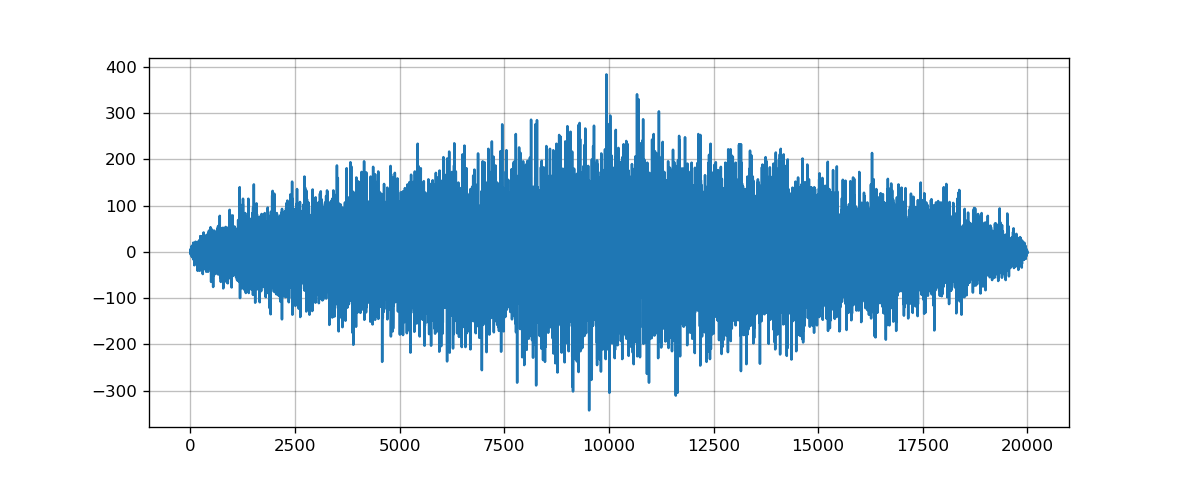

In [19]:
%matplotlib notebook
from matplotlib import pyplot as plt
from numpy import correlate

b1 = array([1 if elem else -1 for elem in lfsr1.stream(10000)])
b2 = array([1 if elem else -1 for elem in lfsr2.stream(10000)])

plt.figure(figsize=(9.9,4))
plt.grid(c='k',alpha=0.25)
plt.plot(correlate(b1,b2,'full'))
# plt.plot(b2)

<IPython.core.display.Javascript object>


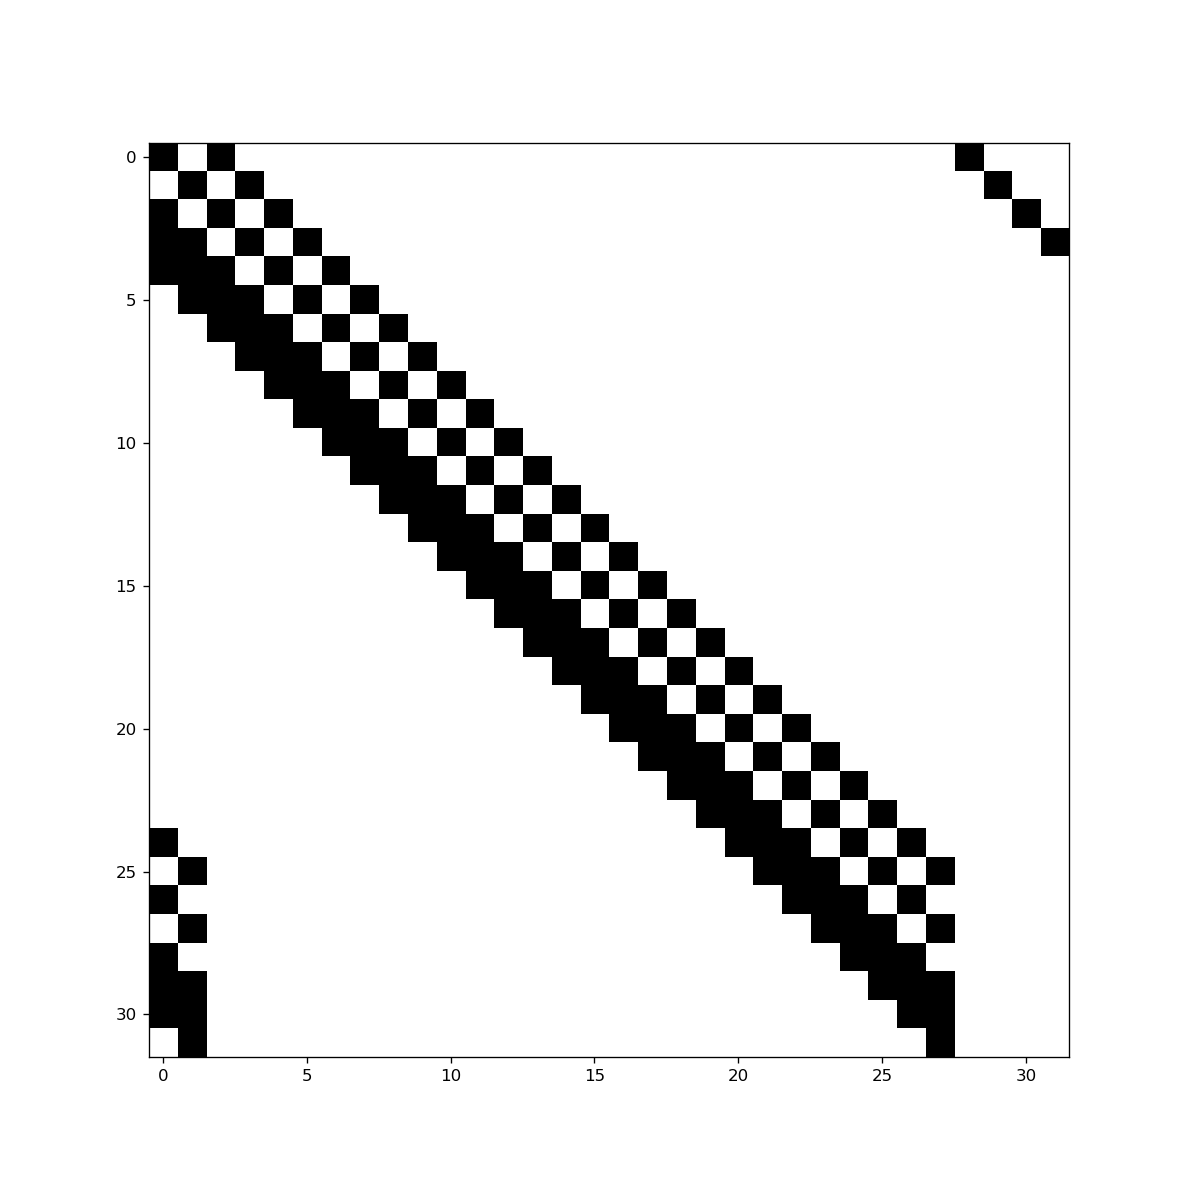

In [41]:
from numpy.linalg import matrix_power
from numpy import max
plt.figure(figsize=(9.9,9.9))
plt.imshow(matrix_power(lfsr2.C,28),cmap='binary',aspect='auto')

In [34]:
max(matrix_power(lfsr2.C,32))

3.0